# Tugas Python Machine Learning with PACMANN AI


## Unsupervised Learning : PCA and Clustering

## 1. Importing Data to Python

In [1]:
# Import pandas

import pandas as pd

##  Dataset Information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. Dataset bank-full.csv ordered by date (from May 2008 to November 2010). The exercise goal is to discover interesting things about the measurement.
   
   
   ### Content
Variables:<br>
  1. age (numeric)
  2. job : type of job (categorical) 
  3. marital : marital status (categorical)
  4. education (categorical)
  5. default: has credit in default? (binary: "yes","no")
  6. balance: average yearly balance, in euros (numeric) 
  7. housing: has housing loan? (binary: "yes","no")
  8. loan: has personal loan? (binary: "yes","no")
  9. contact: contact communication type (categorical) 
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical)
  12. duration: last contact duration, in seconds (numeric)
  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical)
<br><br>
Source :  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. <br>
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.



In [2]:
# Baca dataset 

data = pd.read_csv("../datasets/bank.csv")

In [3]:
# Check 5 Observasi pertama dataset

data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


## Droping Duplicates

In [4]:
# Cek shape dari data yang akan di drop duplicate nya

data.shape

(45211, 17)

In [5]:
# Cek jika ada atau tidak observasi yang duplikat

data.duplicated().sum()

0

In [6]:
# Drop data yang duplikat

data = data.drop_duplicates()

In [7]:
# Cek kembali shape

data.shape

(45211, 17)

In [8]:
# Cek kembali data

data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


### Make function to import and drop 

Buat lah sebuah function dengan spesifikasi:

 1. import data
 2. cek JUMLAH OBSERVASI dan JUMLAH COLUMN
 3. drop duplicate
 4. drop unnecassary column
 5. cek JUMLAH OBSERVASI dan JUMLAH COLUMN, setelah di-drop
 6. return data setelah di-drop

Function dinamakan dengan `import_data` dan menerima 2 argument yaitu:

 1. `filepath`: Direktori dimana data tersimpan
 2. `drop`    : Nama kolom yang ingin di hapus
 
Lalu assign function tersebut pada suatu variabel yang dengan nama `data_bank`

In [9]:
# Buatlah function 

def importData(path, drop):
    data = pd.read_csv(path)
    print("Data asli : %d Observasi, %d Kolom." %data.shape, '\n')   
    print("Kolom yang di drop :", drop, '\n')
    data_drop = data.drop(drop, axis=1)
    print("Banyaknya data duplicate :", data_drop.duplicated().sum(), '\n')
    data_unique = data_drop.drop_duplicates()
    print("Data setelah di drop : %d Observasi, %d Kolom." %data_unique.shape)    
    
    return data_unique

In [10]:
# Assign fuction kepada variabel data

drop = ['Unnamed: 0']

data_bank = importData("bank.csv", drop)

Data asli : 45211 Observasi, 17 Kolom. 

Kolom yang di drop : ['Unnamed: 0'] 

Banyaknya data duplicate : 0 

Data setelah di drop : 45211 Observasi, 16 Kolom.


## 2. Data Preprocessing
### Input-Output Split

Disini kita akan memisahkan kolom berdasarkan input dan output.

Data yang digunakan untuk input akan dinamakan dengan `X`, sedangkan untuk output dengan `y`.

Pada dataset ini, kita hanya perlu menggunakan kolom `target` sebagai output kita. 

In [11]:
# Cek data menggunakan head()

data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


## Train and Test Split

Pada bagian ini, data_bank akan dibagi menjadi 2 set yaitu training dan tes. Kita akan menggunakan function dari library Scikit Learn yaitu `train_test_split`.

In [12]:
# import train_test_split

from sklearn.model_selection import train_test_split

In [13]:
# Split dataset

data_train, data_test = train_test_split(data_bank, test_size = 0.20, random_state = 123)

In [14]:
# Cek shape untuk tiap set (data_train, data_test)

print("data train", data_train.shape)
print("data test", data_test.shape)

data train (36168, 16)
data test (9043, 16)


In [15]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
28686,29,services,single,secondary,no,-205,no,no,cellular,30,jan,194,1,-1,0,unknown
9304,53,blue-collar,married,primary,no,0,yes,no,unknown,5,jun,285,2,-1,0,unknown
41425,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success
44803,30,technician,single,tertiary,no,0,no,no,cellular,15,sep,214,2,-1,0,unknown
5878,30,unemployed,married,secondary,no,529,yes,yes,unknown,26,may,107,3,-1,0,unknown


In [16]:
# dump data_train columns

from sklearn.externals import joblib
joblib.dump(data_train.columns,'input_col.pkl')

['input_col.pkl']

### Preprocessing Month 

In [17]:
data_month = data_train['month']
data_month.head()

28686    jan
9304     jun
41425    sep
44803    sep
5878     may
Name: month, dtype: object

In [18]:
data_month.value_counts(normalize=True)

may    0.306182
jul    0.153312
aug    0.136751
jun    0.118309
nov    0.087177
apr    0.064587
feb    0.057675
jan    0.031188
oct    0.016479
sep    0.012608
mar    0.011087
dec    0.004645
Name: month, dtype: float64

In [19]:
data_month = data_month.replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [20]:
data_month.value_counts(normalize=True)

5     0.306182
7     0.153312
8     0.136751
6     0.118309
11    0.087177
4     0.064587
2     0.057675
1     0.031188
10    0.016479
9     0.012608
3     0.011087
12    0.004645
Name: month, dtype: float64

In [21]:
data_train['month'] = data_train['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
28686,29,services,single,secondary,no,-205,no,no,cellular,30,1,194,1,-1,0,unknown
9304,53,blue-collar,married,primary,no,0,yes,no,unknown,5,6,285,2,-1,0,unknown
41425,55,management,married,primary,no,2587,no,no,cellular,4,9,328,2,94,2,success
44803,30,technician,single,tertiary,no,0,no,no,cellular,15,9,214,2,-1,0,unknown
5878,30,unemployed,married,secondary,no,529,yes,yes,unknown,26,5,107,3,-1,0,unknown


## Separating Numerical and Categorical Data Manually

## Getting Numerical

In [23]:
# get numeric using ._get_numeric_data()

data_train_num = data_train._get_numeric_data()

In [24]:
# check the columns

data_train_num.head()

,age,balance,day,month,duration,campaign,pdays,previous
28686,29,-205,30,1,194,1,-1,0
9304,53,0,5,6,285,2,-1,0
41425,55,2587,4,9,328,2,94,2
44803,30,0,15,9,214,2,-1,0
5878,30,529,26,5,107,3,-1,0


In [25]:
# drop unexpected numerical column if any
# num_categorical = [....]
# data_train_num = data_train_num.drop(num_categorical, axis = 1)

In [26]:
data_train_num.head()

,age,balance,day,month,duration,campaign,pdays,previous
28686,29,-205,30,1,194,1,-1,0
9304,53,0,5,6,285,2,-1,0
41425,55,2587,4,9,328,2,94,2
44803,30,0,15,9,214,2,-1,0
5878,30,529,26,5,107,3,-1,0


## Getting Categorical


In [27]:
# Get Categorical

categorical = [x for x in data_train.columns if x not in data_train_num.columns]
data_train_cat = data_train[categorical]

In [28]:
# check the top observations!

data_train_cat.head()

,job,marital,education,default,housing,loan,contact,poutcome
28686,services,single,secondary,no,no,no,cellular,unknown
9304,blue-collar,married,primary,no,yes,no,unknown,unknown
41425,management,married,primary,no,no,no,cellular,success
44803,technician,single,tertiary,no,no,no,cellular,unknown
5878,unemployed,married,secondary,no,yes,yes,unknown,unknown


### Make a function for Separating Numerical and Categorical

In [29]:
# Def a function that returns data_train numerical and data_train categorical

def splitNumCat(data, num_categorical):
    data_num = data._get_numeric_data()
    data_num = data_num.drop(num_categorical, axis = 1)
    data_cat = data.drop(list(data_num.columns.values) , axis = 1)

    return data_num, data_cat

In [30]:
# call function

data_train_num, data_train_cat = splitNumCat(data_train, [])

In [31]:
# check the top of the data_train numerical observations!

data_train_num.head()

,age,balance,day,month,duration,campaign,pdays,previous
28686,29,-205,30,1,194,1,-1,0
9304,53,0,5,6,285,2,-1,0
41425,55,2587,4,9,328,2,94,2
44803,30,0,15,9,214,2,-1,0
5878,30,529,26,5,107,3,-1,0


In [32]:
# dump numerical columns

joblib.dump(data_train_num.columns, "numerical_cols.pkl")

['numerical_cols.pkl']

In [33]:
# check the top of the data_train categorical observations!

data_train_cat.head()

,job,marital,education,default,housing,loan,contact,poutcome
28686,services,single,secondary,no,no,no,cellular,unknown
9304,blue-collar,married,primary,no,yes,no,unknown,unknown
41425,management,married,primary,no,no,no,cellular,success
44803,technician,single,tertiary,no,no,no,cellular,unknown
5878,unemployed,married,secondary,no,yes,yes,unknown,unknown


In [34]:
# dump categorical columns

joblib.dump(data_train_cat.columns, "categorical_cols.pkl")

['categorical_cols.pkl']

## !!!! Exercise kali ini hanya akan menggunakan feature numeric untuk input clustering !!!!


## Numerical Data Imputation

In [35]:
# check the missing value of the data_train_num

data_train_num.isnull().sum()

age         0
balance     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

* Make a function for numerical imputation

In [36]:
# Import Imputer

from sklearn.preprocessing import Imputer

In [37]:
# Define a function only to fit Imputer
#
# input argument : data, missing_values, strategy
#
# return fitted Imputer

def fitImputNum(data, missing_values, strategy):
    # define imput
    imput = Imputer(missing_values=missing_values, strategy=strategy)
    
    # fit
    imput.fit(data)

    return imput

In [38]:
# Call function for fitting Imputer

imputer = fitImputNum(data_train_num, 'NaN', 'median')

In [39]:
# dump imputer

joblib.dump(imputer, 'imputer.pkl')

['imputer.pkl']

In [40]:
# Define a function to transform Numerical data using Imputer
#
# input argument : data, imputer
#
# return data_num_imputed

def transformNumerical(data, imputer):
    # transform
    data_numeric = pd.DataFrame(imputer.transform(data))

    # replace broken column and index
    data_numeric.columns = data.columns
    data_numeric.index = data.index

    return data_numeric

In [41]:
# Call function for transform Numerical data

data_train_num_imputed = transformNumerical(data_train_num, imputer)

In [42]:
# check the missing value of the imputed data

data_train_num_imputed.isnull().sum()

age         0
balance     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

## Standardizing Numerical Variables

- KEGUNAAN: Menyamakan skala dari variable input
- fit: imputer agar mengetahui mean standard deviasi dari setiap column
- transform: isi data dengan value yang dinormalisasi
- output dari transform berupda pd dataframe
- normalize dikeluarkan karena akan dipakai di test

In [43]:
#Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [44]:
# def fitStandardize(data)
#
# return fitted standardizer

def fitStandardize(data):    
    #define standardizer
    standard = StandardScaler()

    #fit
    standard.fit(data)

    return standard

In [45]:
# def transformStandardize(data, standardizer)
#
# return standardized_data

def transformStandardize(data, standard):
    # transform data
    data_standard = pd.DataFrame(standard.transform(data))

    # replace broken column and index
    data_standard.columns = data.columns
    data_standard.index = data.index

    return data_standard

In [46]:
# call fitStandardize

normalizer = fitStandardize(data_train_num_imputed)

In [47]:
# dump standardizer

joblib.dump(normalizer, 'normalizer.pkl')

['normalizer.pkl']

In [48]:
# call transformStandardize

data_train_standardized = transformStandardize(data_train_num_imputed, normalizer)

In [49]:
# check data

data_train_standardized.head()

,age,balance,day,month,duration,campaign,pdays,previous
28686,-1.125848,-0.525607,1.708742,-2.139124,-0.250585,-0.568295,-0.411533,-0.245565
9304,1.136220,-0.457253,-1.299839,-0.057878,0.100475,-0.245219,-0.411533,-0.245565
41425,1.324725,0.405335,-1.420182,1.190870,0.266360,-0.245219,0.537396,0.600341
44803,-1.031595,-0.457253,-0.096406,1.190870,-0.173429,-0.245219,-0.411533,-0.245565
5878,-1.031595,-0.280868,1.227369,-0.474127,-0.586213,0.077857,-0.411533,-0.245565


In [50]:
data_train_clean = data_train_standardized

In [51]:
data_train_clean.head()

,age,balance,day,month,duration,campaign,pdays,previous
28686,-1.125848,-0.525607,1.708742,-2.139124,-0.250585,-0.568295,-0.411533,-0.245565
9304,1.136220,-0.457253,-1.299839,-0.057878,0.100475,-0.245219,-0.411533,-0.245565
41425,1.324725,0.405335,-1.420182,1.190870,0.266360,-0.245219,0.537396,0.600341
44803,-1.031595,-0.457253,-0.096406,1.190870,-0.173429,-0.245219,-0.411533,-0.245565
5878,-1.031595,-0.280868,1.227369,-0.474127,-0.586213,0.077857,-0.411533,-0.245565


## 3. Dimensionality Reduction
> * Dataset typically high dimension<br>
* As Dimensionality grows : fewer observation per region<br>
>1 Dimension  : 3 region<br>
2 Dimension : 3^2 region<br>
3 Dimension : 3^3 region<br>
N Dimension : 3^n region
![Save curseofdimesionality.png from gdrive in same folder, then run this cell](curseofdimesionality.png)

Goal: represent data in fewer variables



In [52]:
# import package PCA :

from sklearn.decomposition import PCA

In [53]:
# define PCA with random_state=123

principal_comp = PCA(random_state=123)

In [54]:
# fit to data_train_clean

principal_comp.fit(data_train_clean)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# component of PCA

component = pd.DataFrame(principal_comp.components_)
component.columns = data_train_clean.columns
component

,age,balance,day,month,duration,campaign,pdays,previous
0,-0.072674,-0.033138,-0.295619,-0.270644,0.055614,-0.261045,0.641095,0.592234
1,0.461428,0.497870,0.277747,0.489020,-0.111163,0.235318,0.210279,0.333131
2,-0.338021,-0.372603,0.423951,-0.113402,-0.427458,0.550972,0.164501,0.202393
3,-0.372058,0.025495,0.430029,0.136764,0.799088,0.046519,0.059064,0.114452
4,-0.694448,0.542764,-0.013474,0.191360,-0.343777,-0.256294,-0.004848,-0.049562
5,0.069562,0.560564,0.074476,-0.739734,0.097257,0.330492,-0.029035,-0.093000
6,-0.203245,0.051963,-0.681618,0.250872,0.187089,0.624711,-0.032940,0.045826
7,-0.026686,0.004248,-0.021824,-0.096359,-0.025374,-0.074637,-0.715736,0.686305


In [56]:
# transform data_train_clean to data_pca

data_pca = pd.DataFrame(principal_comp.transform(data_train_clean))

In [57]:
# check top observation

data_pca.head()

,0,1,2,3,4,5,6,7
0,-0.101808,-1.626875,1.220008,0.568645,0.310156,1.159288,-1.899443,0.371434
1,-0.007162,-0.329914,-1.053652,-0.984813,-0.988314,-0.267760,0.484691,0.143451
2,0.766717,1.226660,-1.375008,-0.628502,-0.514009,-0.793902,0.925047,-0.078459
3,-0.558575,-0.354845,0.164782,0.291162,0.834027,-1.279310,0.367039,0.061660
4,-0.612426,-0.591658,1.203544,0.322387,0.652415,0.216437,-0.819203,0.180316


In [58]:
# rename columns

data_pca.columns = range(1,data_pca.shape[1]+1)
data_pca = data_pca.add_prefix("PC_")
data_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,-0.101808,-1.626875,1.220008,0.568645,0.310156,1.159288,-1.899443,0.371434
1,-0.007162,-0.329914,-1.053652,-0.984813,-0.988314,-0.267760,0.484691,0.143451
2,0.766717,1.226660,-1.375008,-0.628502,-0.514009,-0.793902,0.925047,-0.078459
3,-0.558575,-0.354845,0.164782,0.291162,0.834027,-1.279310,0.367039,0.061660
4,-0.612426,-0.591658,1.203544,0.322387,0.652415,0.216437,-0.819203,0.180316


In [59]:
# replace broken index

data_pca.index = data_train_clean.index

In [60]:
# check top observations

data_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
28686,-0.101808,-1.626875,1.220008,0.568645,0.310156,1.159288,-1.899443,0.371434
9304,-0.007162,-0.329914,-1.053652,-0.984813,-0.988314,-0.267760,0.484691,0.143451
41425,0.766717,1.226660,-1.375008,-0.628502,-0.514009,-0.793902,0.925047,-0.078459
44803,-0.558575,-0.354845,0.164782,0.291162,0.834027,-1.279310,0.367039,0.061660
5878,-0.612426,-0.591658,1.203544,0.322387,0.652415,0.216437,-0.819203,0.180316


#### Best n_components?

In [61]:
# using all components will explain all variance

sum(principal_comp.explained_variance_ratio_)

0.99999999999999989

In [62]:
# variance ratio explained by n_components :

for i in range(1, len(principal_comp.explained_variance_ratio_)+1):
    print (i, sum(principal_comp.explained_variance_ratio_[0:i]))

1 0.191535761713
2 0.340651197112
3 0.485097617576
4 0.607705589499
5 0.71960343072
6 0.82924401823
7 0.931400107743
8 1.0


## Exercise! 
PCA fitting & transform using user-defined function

In [63]:
# def fitPCA(data):
#
# return PCA(by selected n_components), component

def fitPCA(data):
    # define PCA using all component
    principal_comp = PCA(random_state=123)
    
    # fit
    principal_comp.fit(data)
        
    # Observe explained variance
    print ('Explained variance using n_components :')
    for i in range(1, len(principal_comp.explained_variance_ratio_)+1):
        print (i, sum(principal_comp.explained_variance_ratio_[0:i]))
    print()
        
    # Select desired n_components
    n_comp = int(input('n_components :'))
        
    # define n_components PCA
    principal_comp = PCA(n_components=n_comp)
                         
    # fit
    principal_comp.fit(data)
    
    # new PCA component
    component = pd.DataFrame(principal_comp.components_)
    component.columns = data.columns
    
    return principal_comp, component

In [64]:
# def transformPCA(data, principal_comp):
#
# return transformedData

def transformPCA(data, principal_comp):
    # transform
    data_pca = pd.DataFrame(principal_comp.transform(data))

    # rename columns
    data_pca.columns = range(1,data_pca.shape[1]+1)
    data_pca = data_pca.add_prefix("PC_")

    # replace broken index
    data_pca.index = data.index

    return data_pca

In [65]:
# call fitPCA

principal_comp, component = fitPCA(data_train_clean)

Explained variance using n_components :
1 0.191535761713
2 0.340651197112
3 0.485097617576
4 0.607705589499
5 0.71960343072
6 0.82924401823
7 0.931400107743
8 1.0

n_components :7


In [66]:
# call transformPCA

data_train_pca = transformPCA(data_train_clean, principal_comp)

In [67]:
# check top observations, due to indexing in python (start from 0) n_components will have PC_0 ~ PC_(n_components-1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
28686,-0.101808,-1.626875,1.220008,0.568645,0.310156,1.159288,-1.899443
9304,-0.007162,-0.329914,-1.053652,-0.984813,-0.988314,-0.267760,0.484691
41425,0.766717,1.226660,-1.375008,-0.628502,-0.514009,-0.793902,0.925047
44803,-0.558575,-0.354845,0.164782,0.291162,0.834027,-1.279310,0.367039
5878,-0.612426,-0.591658,1.203544,0.322387,0.652415,0.216437,-0.819203


In [68]:
# check components

component

,age,balance,day,month,duration,campaign,pdays,previous
0,-0.072674,-0.033138,-0.295619,-0.270644,0.055614,-0.261045,0.641095,0.592234
1,0.461428,0.497870,0.277747,0.489020,-0.111163,0.235318,0.210279,0.333131
2,-0.338021,-0.372603,0.423951,-0.113402,-0.427458,0.550972,0.164501,0.202393
3,-0.372058,0.025495,0.430029,0.136764,0.799088,0.046519,0.059064,0.114452
4,-0.694448,0.542764,-0.013474,0.191360,-0.343777,-0.256294,-0.004848,-0.049562
5,0.069562,0.560564,0.074476,-0.739734,0.097257,0.330492,-0.029035,-0.093000
6,-0.203245,0.051963,-0.681618,0.250872,0.187089,0.624711,-0.032940,0.045826


In [69]:
# dump PCA

joblib.dump(principal_comp, 'pca.pkl')

['pca.pkl']

## 4. Clustering
> * Goal : Make separate group with similar character, and assign them into cluster
* Task of clustering is subjective.<br>
![Save clustering.png from gdrive in same folder, then run this cell](clustering.png)

In [70]:
# import KMeans package from sklearn.cluster :

from sklearn.cluster import KMeans

In [71]:
# define KMeans, use n_cluster=3 as initial try

kmeans_clust = KMeans(n_clusters = 3, random_state = 123)

In [72]:
# fit

kmeans_clust.fit(data_train_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [73]:
# predict cluster

kmeans_clust.predict(data_train_clean)

array([1, 2, 2, ..., 1, 1, 1])

In [74]:
# reshape predicted cluster to DataFrame

cluster = pd.DataFrame(kmeans_clust.predict(data_train_clean), columns=['Cluster'], index = data_train_clean.index)

In [75]:
# check top observations

cluster.head()

,Cluster
28686,1
9304,2
41425,2
44803,1
5878,1


In [76]:
# check cluster proportion

cluster['Cluster'].value_counts(normalize=True)

1    0.442380
2    0.429523
0    0.128097
Name: Cluster, dtype: float64

In [77]:
# check centroid

kmeans_clust.cluster_centers_

array([[ -5.08046849e-02,   2.96384018e-04,  -2.77076998e-01,
         -5.38144454e-01,   4.58737803e-03,  -1.90722590e-01,
          2.31231392e+00,   1.29680831e+00],
       [  2.80762791e-02,   7.94931911e-02,   8.52865435e-01,
          3.62818889e-01,  -1.03261744e-01,   2.42937555e-01,
         -3.08432938e-01,  -1.74266656e-01],
       [ -1.37715159e-02,  -8.20288890e-02,  -7.96392241e-01,
         -2.13310918e-01,   1.05070981e-01,  -1.93471092e-01,
         -3.72474926e-01,  -2.07565240e-01]])

In [78]:
# reshape to DataFrame

centroid = pd.DataFrame(kmeans_clust.cluster_centers_, columns = data_train_clean.columns)
centroid

,age,balance,day,month,duration,campaign,pdays,previous
0,-0.050805,0.000296,-0.277077,-0.538144,0.004587,-0.190723,2.312314,1.296808
1,0.028076,0.079493,0.852865,0.362819,-0.103262,0.242938,-0.308433,-0.174267
2,-0.013772,-0.082029,-0.796392,-0.213311,0.105071,-0.193471,-0.372475,-0.207565


#### Inverse transform from standardizer

In [79]:
# inverse transform

centroid_real = pd.DataFrame(normalizer.inverse_transform(centroid), columns=data_train_clean.columns)

In [80]:
# real centroid

centroid_real

,age,balance,day,month,duration,campaign,pdays,previous
0,40.405953,1372.243097,13.498706,4.846204,260.144521,2.168680,271.692192,3.646678
1,41.242862,1609.763324,22.888035,7.010684,232.188379,3.510965,9.321649,0.168572
2,40.798866,1125.340246,9.183422,5.626586,286.191409,2.160173,2.910221,0.089843


#### Best K?

In [81]:
?kmeans_clust.score

In [82]:
# Evaluate score for K in range 2-10

score = pd.Series([])
for i in range(2,11):
    kmeans_clust = KMeans(n_clusters=i, max_iter=1000, n_jobs = -1, random_state = 123)
    kmeans_clust.fit(data_train_clean)
    score[i] = kmeans_clust.score(data_train_clean)
    
print (score)

2    -249522.285987
3    -223656.564766
4    -204761.120220
5    -186619.944837
6    -170554.182625
7    -155279.838579
8    -142104.978481
9    -130670.020751
10   -123124.149316
dtype: float64


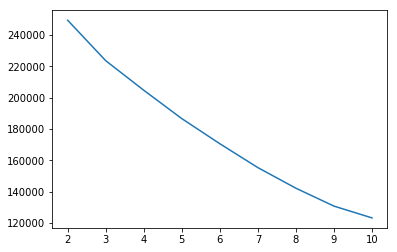

In [83]:
# import necessary library

from matplotlib import pyplot as plt
%matplotlib inline

# plot score
plt.plot(range(2,11),-1*score)

In [84]:
# choose best(subjective) n_clusters, for example n_clusters=9

kmeans_clust9 = KMeans(n_clusters=9,random_state=123)

In [85]:
# fit

kmeans_clust9.fit(data_train_clean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

#### Predict Cluster

In [86]:
# predict cluster

cluster9 = pd.DataFrame(kmeans_clust9.predict(data_train_clean), columns=['Cluster'], index = data_train_clean.index)
cluster9.head()

,Cluster
28686,2
9304,4
41425,4
44803,1
5878,2


In [87]:
# dump best kmeans

joblib.dump(kmeans_clust9,'kmeans_clust9.pkl')

['kmeans_clust9.pkl']

## Exercise!
Clustering data_train_pca

In [88]:
# best K in data_train_pca
    # Evaluate score for K in range 2-10

score = pd.Series([])
for i in range(2,11):
    kmeans_clust = KMeans(n_clusters=i, max_iter=1000, n_jobs = -1, random_state = 123)
    kmeans_clust.fit(data_train_pca)
    score[i] = kmeans_clust.score(data_train_pca)
print(score)

2    -231970.132410
3    -206286.289010
4    -187073.043132
5    -169316.435501
6    -153555.203949
7    -138197.839333
8    -126940.681598
9    -121260.566833
10   -115870.177258
dtype: float64


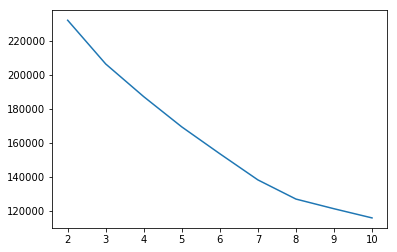

In [89]:
# plot score

plt.plot(range(2,11),-1*score)

In [90]:
# define KMeans

kmeans_clust_pca = KMeans(n_clusters=8, random_state=123)

In [91]:
# fit to data_train_pca

kmeans_clust_pca.fit(data_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [92]:
# predict (and reshape to DataFrame)

cluster_pca = pd.DataFrame(kmeans_clust_pca.predict(data_train_pca), columns=['Cluster'], index = data_train_pca.index)
cluster_pca.head()

,Cluster
28686,7
9304,1
41425,1
44803,4
5878,7


In [93]:
# centroid (in DataFrame)

centroid_pca = pd.DataFrame(kmeans_clust_pca.cluster_centers_, columns = data_train_pca.columns)
centroid_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-0.380305,2.868699,-2.125143,0.003482,2.676897,2.611759,0.193051
1,-0.301645,0.339469,-0.612918,-0.813133,-0.804840,0.022068,-0.139501
2,2.713242,0.403445,0.651066,0.034084,-0.078580,0.151683,-0.081775
3,-1.812084,1.135712,2.759321,0.164795,-0.939174,1.184133,2.110074
4,-0.423576,1.116383,-0.207245,0.257189,0.573984,-1.433984,0.061339
5,0.057386,-0.918566,-0.200995,-0.373007,0.384985,-0.040846,0.472801
6,-0.040158,-0.461661,-1.349492,2.275316,-0.952834,0.252705,0.490482
7,-0.606967,-0.189183,0.646866,0.334550,0.185357,0.130342,-0.789669


In [94]:
# inverse transform centroid_pca (using PCA_NAME.inverse_transform())

centroid_pca_inv = pd.DataFrame(principal_comp.inverse_transform(centroid_pca), columns=data_train_clean.columns)
centroid_pca_inv

,age,balance,day,month,duration,campaign,pdays,previous
0,0.351862,5.159782,0.036597,0.375928,-0.058978,-0.098706,-0.085135,-0.066011
1,1.277082,-0.045064,-0.318485,0.000608,-0.189547,-0.090480,-0.262997,-0.251228
2,-0.162034,-0.092640,-0.331258,-0.753958,-0.118556,-0.233852,1.932067,1.862987
3,-0.032566,-0.134765,0.754390,0.229135,-0.442031,4.218502,-0.558591,-0.084388
4,0.009457,0.164512,0.301684,1.905241,-0.178863,-0.311654,-0.018869,0.216259
5,-0.587589,-0.183219,-0.848208,-0.270450,-0.154712,-0.176035,-0.227715,-0.349003
6,-0.020913,-0.017702,-0.012681,0.003104,2.888019,-0.101710,-0.229300,-0.144089
7,-0.345468,-0.173933,1.090454,-0.214898,-0.220682,-0.011849,-0.281406,-0.310774


In [95]:
centroid_num_pca = centroid_pca_inv[data_train_num_imputed.columns]
centroid_num_pca.head()

,age,balance,day,month,duration,campaign,pdays,previous
0,0.351862,5.159782,0.036597,0.375928,-0.058978,-0.098706,-0.085135,-0.066011
1,1.277082,-0.045064,-0.318485,0.000608,-0.189547,-0.090480,-0.262997,-0.251228
2,-0.162034,-0.092640,-0.331258,-0.753958,-0.118556,-0.233852,1.932067,1.862987
3,-0.032566,-0.134765,0.754390,0.229135,-0.442031,4.218502,-0.558591,-0.084388
4,0.009457,0.164512,0.301684,1.905241,-0.178863,-0.311654,-0.018869,0.216259


In [96]:
# inverse transform from standardizer

centroid_real_pca = pd.DataFrame(normalizer.inverse_transform(centroid_num_pca), columns=data_train_num_imputed.columns)
centroid_real_pca

,age,balance,day,month,duration,campaign,pdays,previous
0,44.678150,16846.125603,16.105196,7.042179,243.667386,2.453495,31.676662,0.424524
1,54.494511,1236.200814,13.154626,6.140507,209.821812,2.478955,13.870393,-0.013389
2,39.225833,1093.516195,13.048483,4.327732,228.223984,2.035183,233.624587,4.985310
3,40.599466,967.178580,22.069744,6.689521,144.374332,15.816322,-15.722414,0.381074
4,41.045313,1864.745880,18.307957,10.716210,212.591277,1.794367,38.310766,1.091905
5,34.710795,821.858539,8.752857,5.489314,218.851736,2.214143,17.402551,-0.244562
6,40.723093,1318.262668,15.695720,6.146502,1007.574110,2.444197,17.243903,0.239922
7,37.279647,849.707931,24.862292,5.622773,201.751174,2.722339,12.027356,-0.154176


In [97]:
# dump kmeans for data_pca

joblib.dump(kmeans_clust_pca, 'kmeans_clust_pca.pkl')

['kmeans_clust_pca.pkl']

## 5. Clustering Test Data

### Preprocessing Test Data


In [98]:
# def validData(data and all necessary object)
#
# return clean_data

def validData(data, numerical_columns,  imputer, standardizer):
    # replace month
    data['month'] = data['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    
    # preprocess numerical data using transformNumerical()
    data_num_imputed = transformNumerical(data[numerical_columns], imputer=imputer)

    # standardize using transformStandardize()
    data_valid = transformStandardize(data_num_imputed, standard=standardizer)

    
    return data_valid

In [99]:
# load necessary object
# object = joblib.load("filename.pkl")

numerical_columns = joblib.load('numerical_cols.pkl')
imputer = joblib.load('imputer.pkl')
standardizer = joblib.load('normalizer.pkl')
pca = joblib.load('pca.pkl')

In [100]:
# preprocess test data

data_test_clean = validData(data_test, numerical_columns, imputer, standardizer)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [101]:
# check top observation

data_test_clean.head()

,age,balance,day,month,duration,campaign,pdays,previous
7281,1.418978,-0.260862,1.588399,-0.474127,1.064924,-0.245219,-0.411533,-0.245565
19469,-0.371825,-0.240856,-1.059152,0.774621,-0.752098,-0.245219,-0.411533,-0.245565
31637,-1.314354,0.200274,-1.179496,-0.890376,-0.624791,-0.568295,-0.411533,-0.245565
22484,0.193692,-0.456920,0.745996,0.774621,-0.076984,0.400933,-0.411533,-0.245565
35919,1.607484,-0.726666,-0.938809,-0.474127,-0.709663,0.400933,-0.411533,-0.245565


In [102]:
# transform test data using PCA

data_test_clean_pca = transformPCA(data_test_clean, pca)

In [103]:
# check top observation

data_test_clean_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
7281,-0.721746,0.389769,-0.362994,0.870769,-1.528207,0.478818,-1.455234
19469,-0.248615,-0.349297,-0.252460,-0.882138,0.625557,-0.932178,0.687726
31637,0.382879,-1.502400,-0.192862,-0.712979,1.241567,0.377838,0.388528
22484,-0.947319,0.382453,0.469612,0.247749,-0.306454,-0.600309,-0.138897
35919,-0.240284,-0.107763,-0.209991,-1.686006,-1.433426,0.083558,0.276490


### Predict Test Data

In [104]:
# load model

kmeans = joblib.load('kmeans_clust9.pkl')
kmeans_pca = joblib.load('kmeans_clust_pca.pkl')

In [105]:
# predict

cluster_test = pd.DataFrame(kmeans.predict(data_test_clean), columns=['Cluster'], index = data_test_clean.index)
cluster_test.head()

,Cluster
7281,2
19469,6
31637,6
22484,2
35919,4


In [106]:
# predict data pca

cluster_test_pca = pd.DataFrame(kmeans_pca.predict(data_test_clean_pca), columns=['Cluster'], index = data_test_clean_pca.index)
cluster_test_pca.head()

,Cluster
7281,7
19469,5
31637,5
22484,7
35919,1
